In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, precision_score, recall_score

In [ ]:
! pip install kaggle

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
from google.colab import files
files.upload()

Saving reviews_0_250.csv to reviews_0_250.csv


In [ ]:
df = pd.read_csv('reviews_0_250.csv')
df

<ipython-input-5-de3656e8d9d5>:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('reviews_0_250.csv')


,Unnamed: 0,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd
0,0,1741593524,5,1.0,1.0,2,0,2,2023-02-01,I use this with the Nudestix “Citrus Clean Bal...,Taught me how to double cleanse!,NaN,brown,dry,black,P504322,Gentle Hydra-Gel Face Cleanser,NUDESTIX,19.0
1,1,31423088263,1,0.0,NaN,0,0,0,2023-03-21,I bought this lip mask after reading the revie...,Disappointed,NaN,NaN,NaN,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
2,2,5061282401,5,1.0,NaN,0,0,0,2023-03-21,My review title says it all! I get so excited ...,New Favorite Routine,light,brown,dry,blonde,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
3,3,6083038851,5,1.0,NaN,0,0,0,2023-03-20,I’ve always loved this formula for a long time...,Can't go wrong with any of them,NaN,brown,combination,black,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
4,4,47056667835,5,1.0,NaN,0,0,0,2023-03-20,"If you have dry cracked lips, this is a must h...",A must have !!!,light,hazel,combination,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602125,602125,7446977307,5,1.0,1.0,12,0,12,2020-12-17,I can’t say enough great things about this pro...,HOLY GRAIL- lash extension safe!!,fair,green,dry,blonde,P467602,Triple Algae Eye Renewal Balm Eye Cream,Algenist,68.0
602126,602126,1991973234,5,1.0,1.0,4,0,4,2020-12-17,I have been using this product for over 6 week...,Game changer!,mediumTan,brown,combination,black,P467602,Triple Algae Eye Renewal Balm Eye Cream,Algenist,68.0
602127,602127,1339171721,5,1.0,1.0,10,0,10,2020-12-17,I love the Triple Algae Eye Renewal Balm! Once...,Triple Algae Eye Renewal Balm is a MUST HAVE,light,hazel,dry,brown,P467602,Triple Algae Eye Renewal Balm Eye Cream,Algenist,68.0
602128,602128,1917233409,5,1.0,1.0,5,0,5,2020-12-17,This made the lines around my eyes so much bet...,NaN,lightMedium,hazel,combination,brown,P467602,Triple Algae Eye Renewal Balm Eye Cream,Algenist,68.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602130 entries, 0 to 602129
Data columns (total 19 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0                602130 non-null  int64  
 1   author_id                 602130 non-null  object 
 2   rating                    602130 non-null  int64  
 3   is_recommended            484644 non-null  float64
 4   helpfulness               270298 non-null  float64
 5   total_feedback_count      602130 non-null  int64  
 6   total_neg_feedback_count  602130 non-null  int64  
 7   total_pos_feedback_count  602130 non-null  int64  
 8   submission_time           602130 non-null  object 
 9   review_text               601131 non-null  object 
 10  review_title              435119 non-null  object 
 11  skin_tone                 496074 non-null  object 
 12  eye_color                 463642 non-null  object 
 13  skin_type                 527447 non-null  o

In [ ]:
df.describe()

,Unnamed: 0,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,price_usd
count,602130.000000,602130.000000,484644.000000,270298.000000,602130.000000,602130.000000,602130.000000,602130.000000
mean,301064.500000,4.311838,0.837922,0.769722,3.660661,0.765473,2.895189,45.723937
std,173820.103131,1.143692,0.368522,0.319103,25.848330,4.968115,22.628880,35.743990
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
25%,150532.250000,4.000000,1.000000,0.666667,0.000000,0.000000,0.000000,23.500000
50%,301064.500000,5.000000,1.000000,0.944444,0.000000,0.000000,0.000000,38.000000
75%,451596.750000,5.000000,1.000000,1.000000,3.000000,0.000000,2.000000,60.000000
max,602129.000000,5.000000,1.000000,1.000000,5464.000000,573.000000,5050.000000,380.000000


In [ ]:
# Mengecek komponen-komponen dataset
print(f"Data Types:\n{df.dtypes}")
print(f"\nRows and Columns:\n{df.shape}")
print(f"\nColumn Names:\n{df.columns}")
print(f"\nNull Values %:\n{df.apply(lambda x: sum(x.isnull()) / len(df))}")

Data Types:
Unnamed: 0                    int64
author_id                    object
rating                        int64
is_recommended              float64
helpfulness                 float64
total_feedback_count          int64
total_neg_feedback_count      int64
total_pos_feedback_count      int64
submission_time              object
review_text                  object
review_title                 object
skin_tone                    object
eye_color                    object
skin_type                    object
hair_color                   object
product_id                   object
product_name                 object
brand_name                   object
price_usd                   float64
dtype: object

Rows and Columns:
(602130, 19)

Column Names:
Index(['Unnamed: 0', 'author_id', 'rating', 'is_recommended', 'helpfulness',
       'total_feedback_count', 'total_neg_feedback_count',
       'total_pos_feedback_count', 'submission_time', 'review_text',
       'review_title', 'skin_tone', 'e

In [ ]:
df.isnull().sum()

Unnamed: 0                       0
author_id                        0
rating                           0
is_recommended              117486
helpfulness                 331832
total_feedback_count             0
total_neg_feedback_count         0
total_pos_feedback_count         0
submission_time                  0
review_text                    999
review_title                167011
skin_tone                   106056
eye_color                   138488
skin_type                    74683
hair_color                  141081
product_id                       0
product_name                     0
brand_name                       0
price_usd                        0
dtype: int64

In [ ]:
df.isnull().mean()*100

Unnamed: 0                   0.000000
author_id                    0.000000
rating                       0.000000
is_recommended              19.511733
helpfulness                 55.109694
total_feedback_count         0.000000
total_neg_feedback_count     0.000000
total_pos_feedback_count     0.000000
submission_time              0.000000
review_text                  0.165911
review_title                27.736701
skin_tone                   17.613472
eye_color                   22.999684
skin_type                   12.403136
hair_color                  23.430322
product_id                   0.000000
product_name                 0.000000
brand_name                   0.000000
price_usd                    0.000000
dtype: float64

In [ ]:
df.shape

(602130, 19)

In [ ]:
cols_to_use = df.columns
cols_to_use = list(cols_to_use)
cols_to_use.append('product_id')
print(cols_to_use)

['Unnamed: 0', 'author_id', 'rating', 'is_recommended', 'helpfulness', 'total_feedback_count', 'total_neg_feedback_count', 'total_pos_feedback_count', 'submission_time', 'review_text', 'review_title', 'skin_tone', 'eye_color', 'skin_type', 'hair_color', 'product_id', 'product_name', 'brand_name', 'price_usd', 'product_id']


In [ ]:
df.head(5)

,Unnamed: 0,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd
0,0,1741593524,5,1.0,1.0,2,0,2,2023-02-01,I use this with the Nudestix “Citrus Clean Bal...,Taught me how to double cleanse!,NaN,brown,dry,black,P504322,Gentle Hydra-Gel Face Cleanser,NUDESTIX,19.0
1,1,31423088263,1,0.0,NaN,0,0,0,2023-03-21,I bought this lip mask after reading the revie...,Disappointed,NaN,NaN,NaN,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
2,2,5061282401,5,1.0,NaN,0,0,0,2023-03-21,My review title says it all! I get so excited ...,New Favorite Routine,light,brown,dry,blonde,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
3,3,6083038851,5,1.0,NaN,0,0,0,2023-03-20,I’ve always loved this formula for a long time...,Can't go wrong with any of them,NaN,brown,combination,black,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
4,4,47056667835,5,1.0,NaN,0,0,0,2023-03-20,"If you have dry cracked lips, this is a must h...",A must have !!!,light,hazel,combination,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0


## Data Pre-Processing

### Handling Missung Value

In [ ]:
missing = []
unique = []
types = []
variables = []
count = []

for item in df.columns:
    variables.append(item)
    missing.append(df[item].isnull().sum())
    unique.append(df[item].nunique())
    types.append(df[item].dtypes)
    count.append(len(df[item]))

output = pd.DataFrame({
    'variable': variables,
    'dtype': types,
    'count': count,
    'unique': unique,
    'missing': missing,
})
print("Df info : ")
output.sort_values("missing",ascending=False).reset_index(drop=True)

Df info : 


,variable,dtype,count,unique,missing
0,helpfulness,float64,602130,2314,331832
1,review_title,object,602130,202373,167011
2,hair_color,object,602130,7,141081
3,eye_color,object,602130,6,138488
4,is_recommended,float64,602130,2,117486
5,skin_tone,object,602130,14,106056
6,skin_type,object,602130,4,74683
7,review_text,object,602130,508467,999
8,brand_name,object,602130,60,0
9,product_name,object,602130,249,0


## Exploratory Data Analysis

In [ ]:
df['submission_time'] = pd.to_datetime(df['submission_time'])

df['year']= df['submission_time'].dt.year

df['month']= df['submission_time'].dt.month

df['day']= df['submission_time'].dt.day

df['weekday']= df['submission_time'].dt.weekday

dw_mapping={
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

df['dayofweek']= df['submission_time'].dt.weekday.map(dw_mapping)

In [ ]:
from matplotlib.ticker import NullFormatter
import matplotlib as mpl
mpl.style.use(['ggplot'])
def hundformatter(x, pos):
    return str(round(x / 1e4, 1))

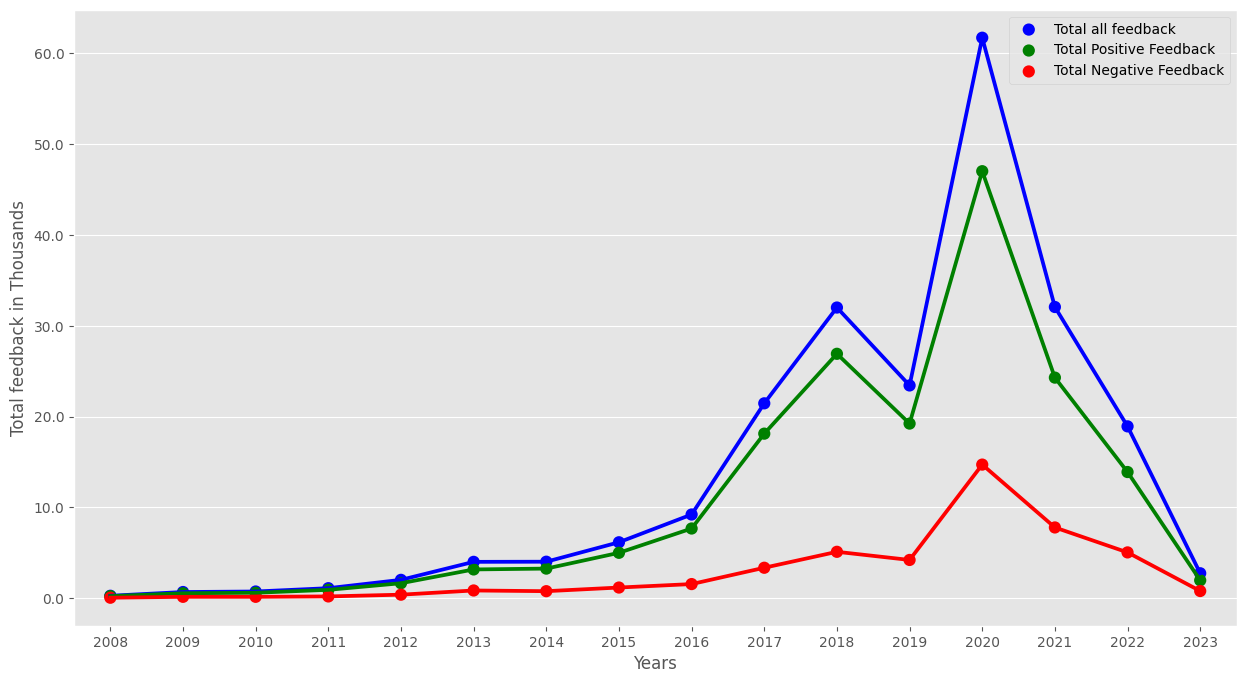

In [ ]:
fig, (ax1) = plt.subplots(nrows=1,ncols=1,figsize= (15,8))
total_feedback = df.groupby('year').sum(numeric_only=True)['total_feedback_count'].reset_index()

sns.pointplot(total_feedback,x='year',y='total_feedback_count', color="blue", label="Total all feedback",ax=ax1)

total_pos_feedback = df.groupby('year').sum(numeric_only=True)['total_pos_feedback_count'].reset_index()
sns.pointplot(total_pos_feedback,x='year',y='total_pos_feedback_count', color="green", label="Total Positive Feedback",ax=ax1)

total_neg_feedback = df.groupby('year').sum(numeric_only=True)['total_neg_feedback_count'].reset_index()
sns.pointplot(total_neg_feedback,x='year',y='total_neg_feedback_count', color="red", label="Total Negative Feedback",ax=ax1)

ax1.yaxis.set_major_formatter(hundformatter)
ax1.set_ylabel("Total feedback in Thousands")
ax1.set_xlabel("Years")
ax1.legend()

Text(0.5, 0.98, 'Top 10 Product')

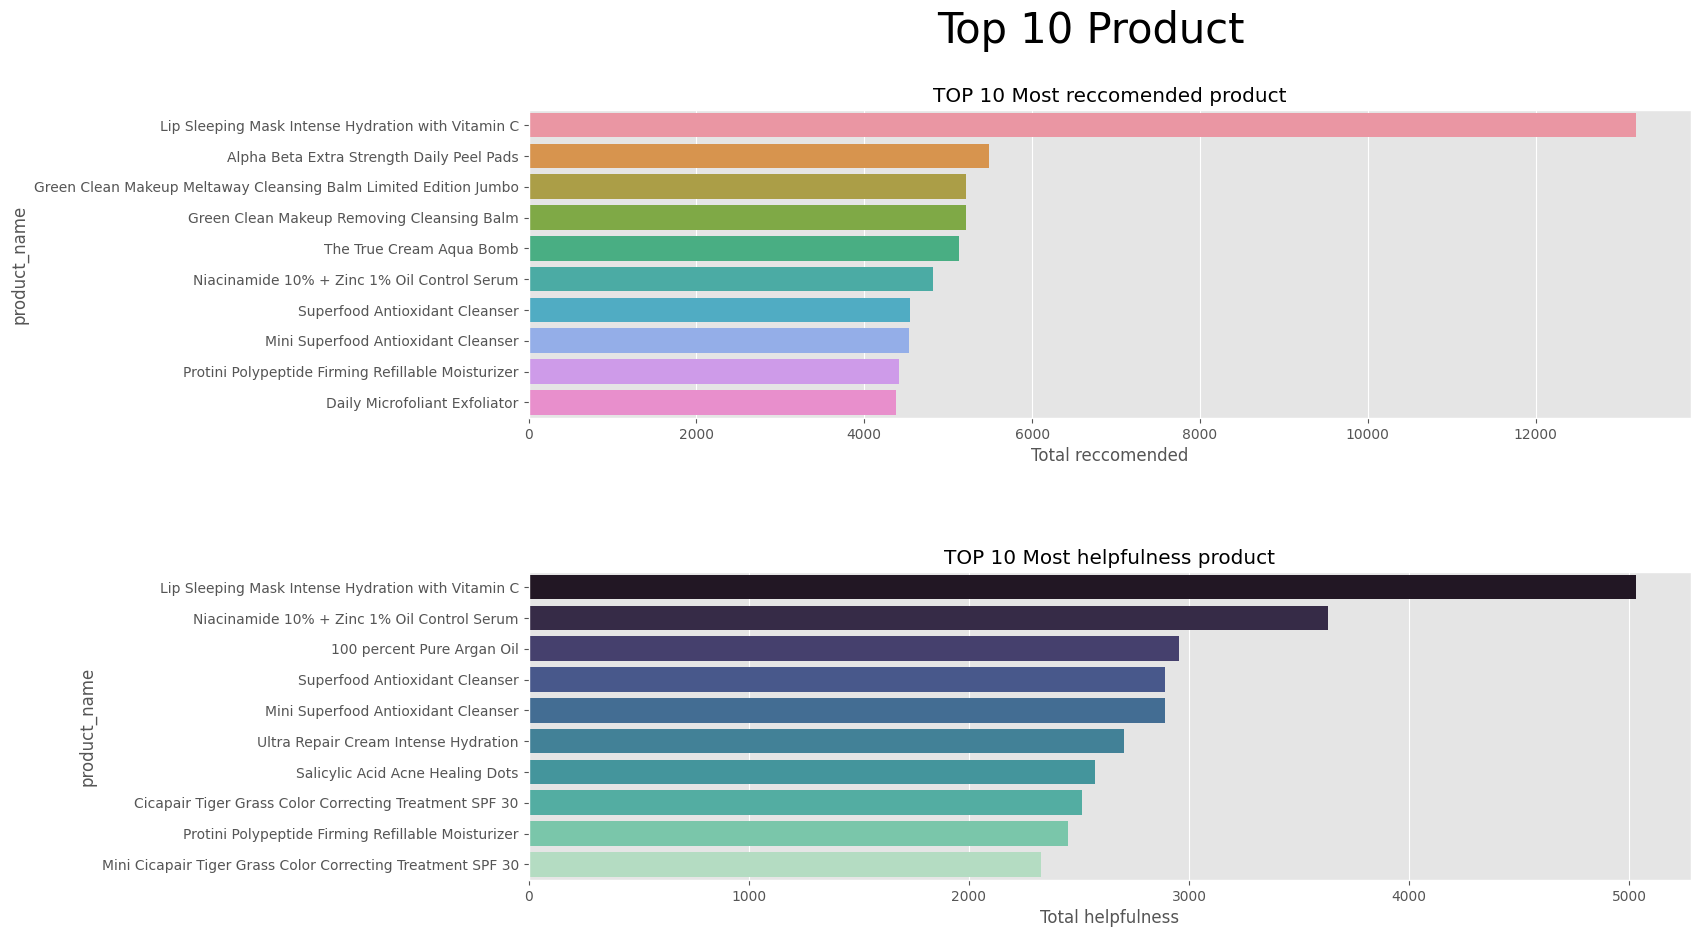

In [ ]:
#Top 10  product
fig, (ax1,ax2) = plt.subplots(nrows=2,ncols=1,figsize= (15,10))
fig.subplots_adjust(hspace=0.5)

most_reccomended = df.groupby(['product_id','product_name','brand_name']).sum(numeric_only=True)['is_recommended'].reset_index()\
.sort_values('is_recommended',ascending=False).head(10)
sns.barplot(most_reccomended,x='is_recommended',y='product_name',ax=ax1)
ax1.set_title("TOP 10 Most reccomended product")
ax1.set_xlabel("Total reccomended")

most_helpfulness = df.groupby(['product_id','product_name','brand_name']).sum(numeric_only=True)['helpfulness'].reset_index()\
.sort_values('helpfulness',ascending=False).head(10)
sns.barplot(most_helpfulness,x='helpfulness',y='product_name',ax=ax2,palette='mako')
ax2.set_title("TOP 10 Most helpfulness product")
ax2.set_xlabel("Total helpfulness")

plt.suptitle("Top 10 Product",fontsize=30)

Text(0.5, 0.98, 'Top 10 Product based on price')

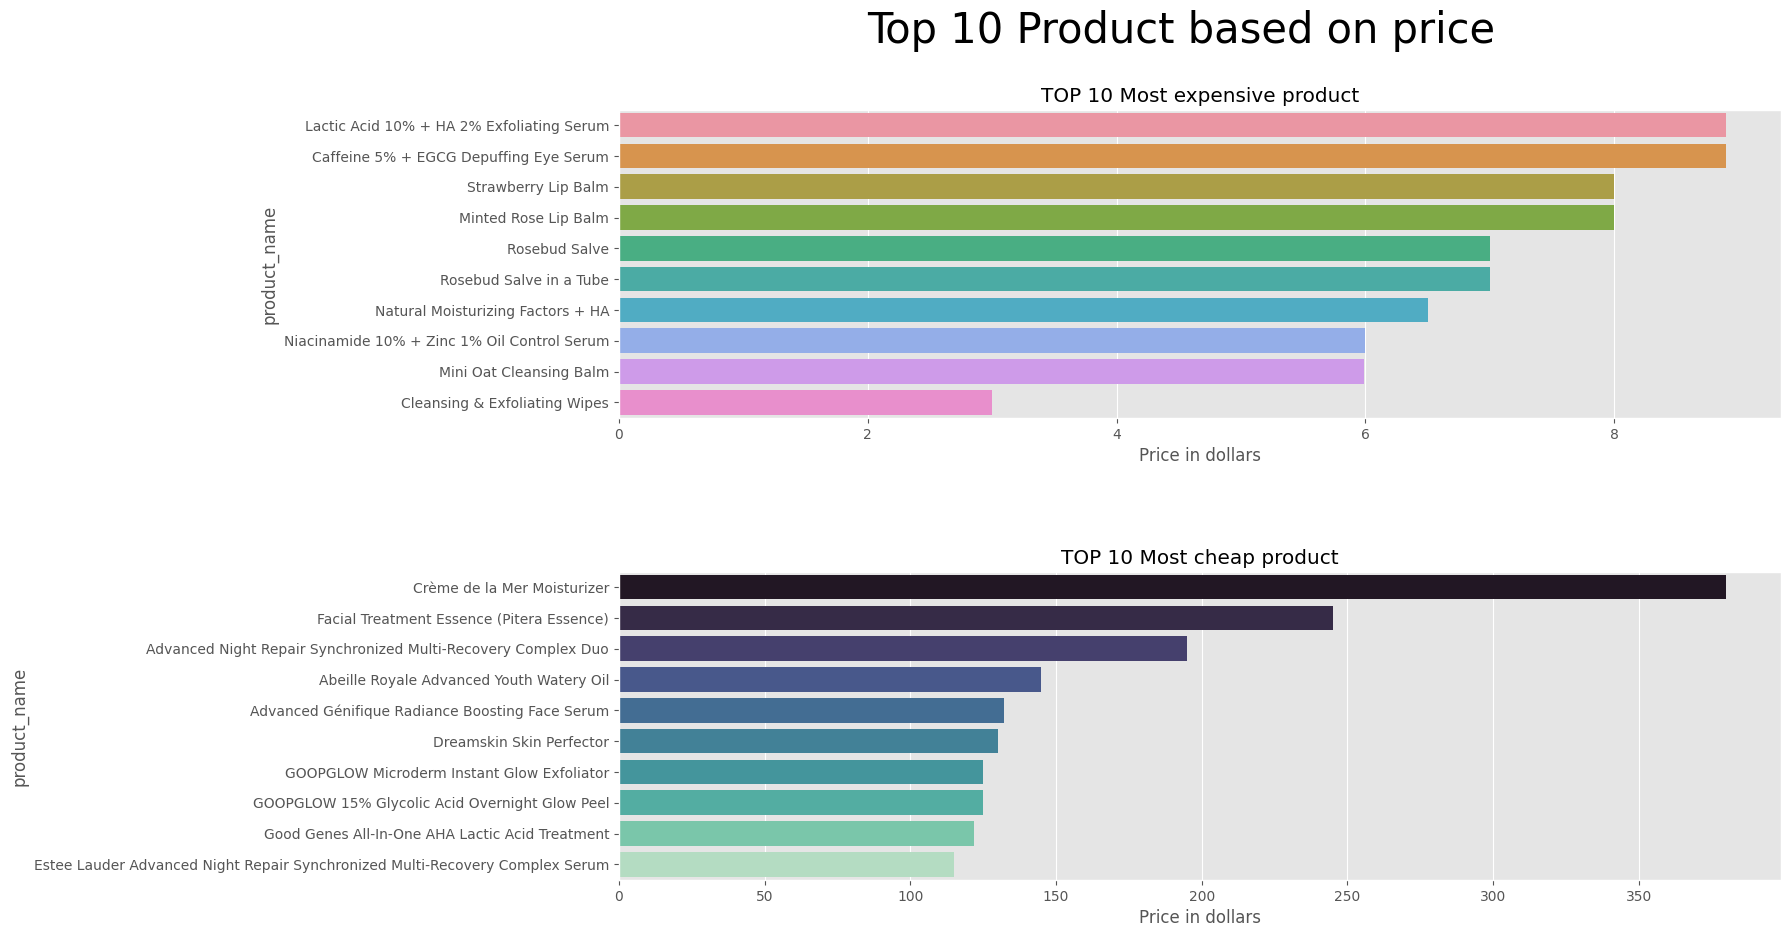

In [ ]:
# Top 10 most expensive and cheap product

#Top 10  product
fig, (ax1,ax2) = plt.subplots(nrows=2,ncols=1,figsize= (15,10))
fig.subplots_adjust(hspace=0.5)

most_expensive = df.groupby(['product_id','product_name','price_usd']).sum(numeric_only=True).reset_index()\
.sort_values('price_usd',ascending=True).head(10).sort_values('price_usd',ascending=False)
most_expensive
sns.barplot(most_expensive,x='price_usd',y='product_name',ax=ax1)
ax1.set_title("TOP 10 Most expensive product")
ax1.set_xlabel("Price in dollars")

cheapest = df.groupby(['product_id','product_name','price_usd']).sum(numeric_only=True).reset_index()\
.sort_values('price_usd',ascending=False).head(10)
sns.barplot(cheapest,x='price_usd',y='product_name',ax=ax2,palette='mako')
ax2.set_title("TOP 10 Most cheap product")
ax2.set_xlabel("Price in dollars")

plt.suptitle("Top 10 Product based on price",fontsize=30)

In [ ]:
# Lets see the relationship between
df['skin_tone'].value_counts()

light          141402
fair           112076
lightMedium    106251
medium          37221
mediumTan       34428
fairLight       30612
tan             17789
deep            10864
rich             2896
olive            1131
porcelain        1040
dark              322
notSureST          41
ebony               1
Name: skin_tone, dtype: int64

In [ ]:
df['skin_type'].value_counts()

combination    292308
dry             99574
normal          69435
oily            66130
Name: skin_type, dtype: int64

Text(0.5, 0.98, 'Most reccomended product for each skin types')

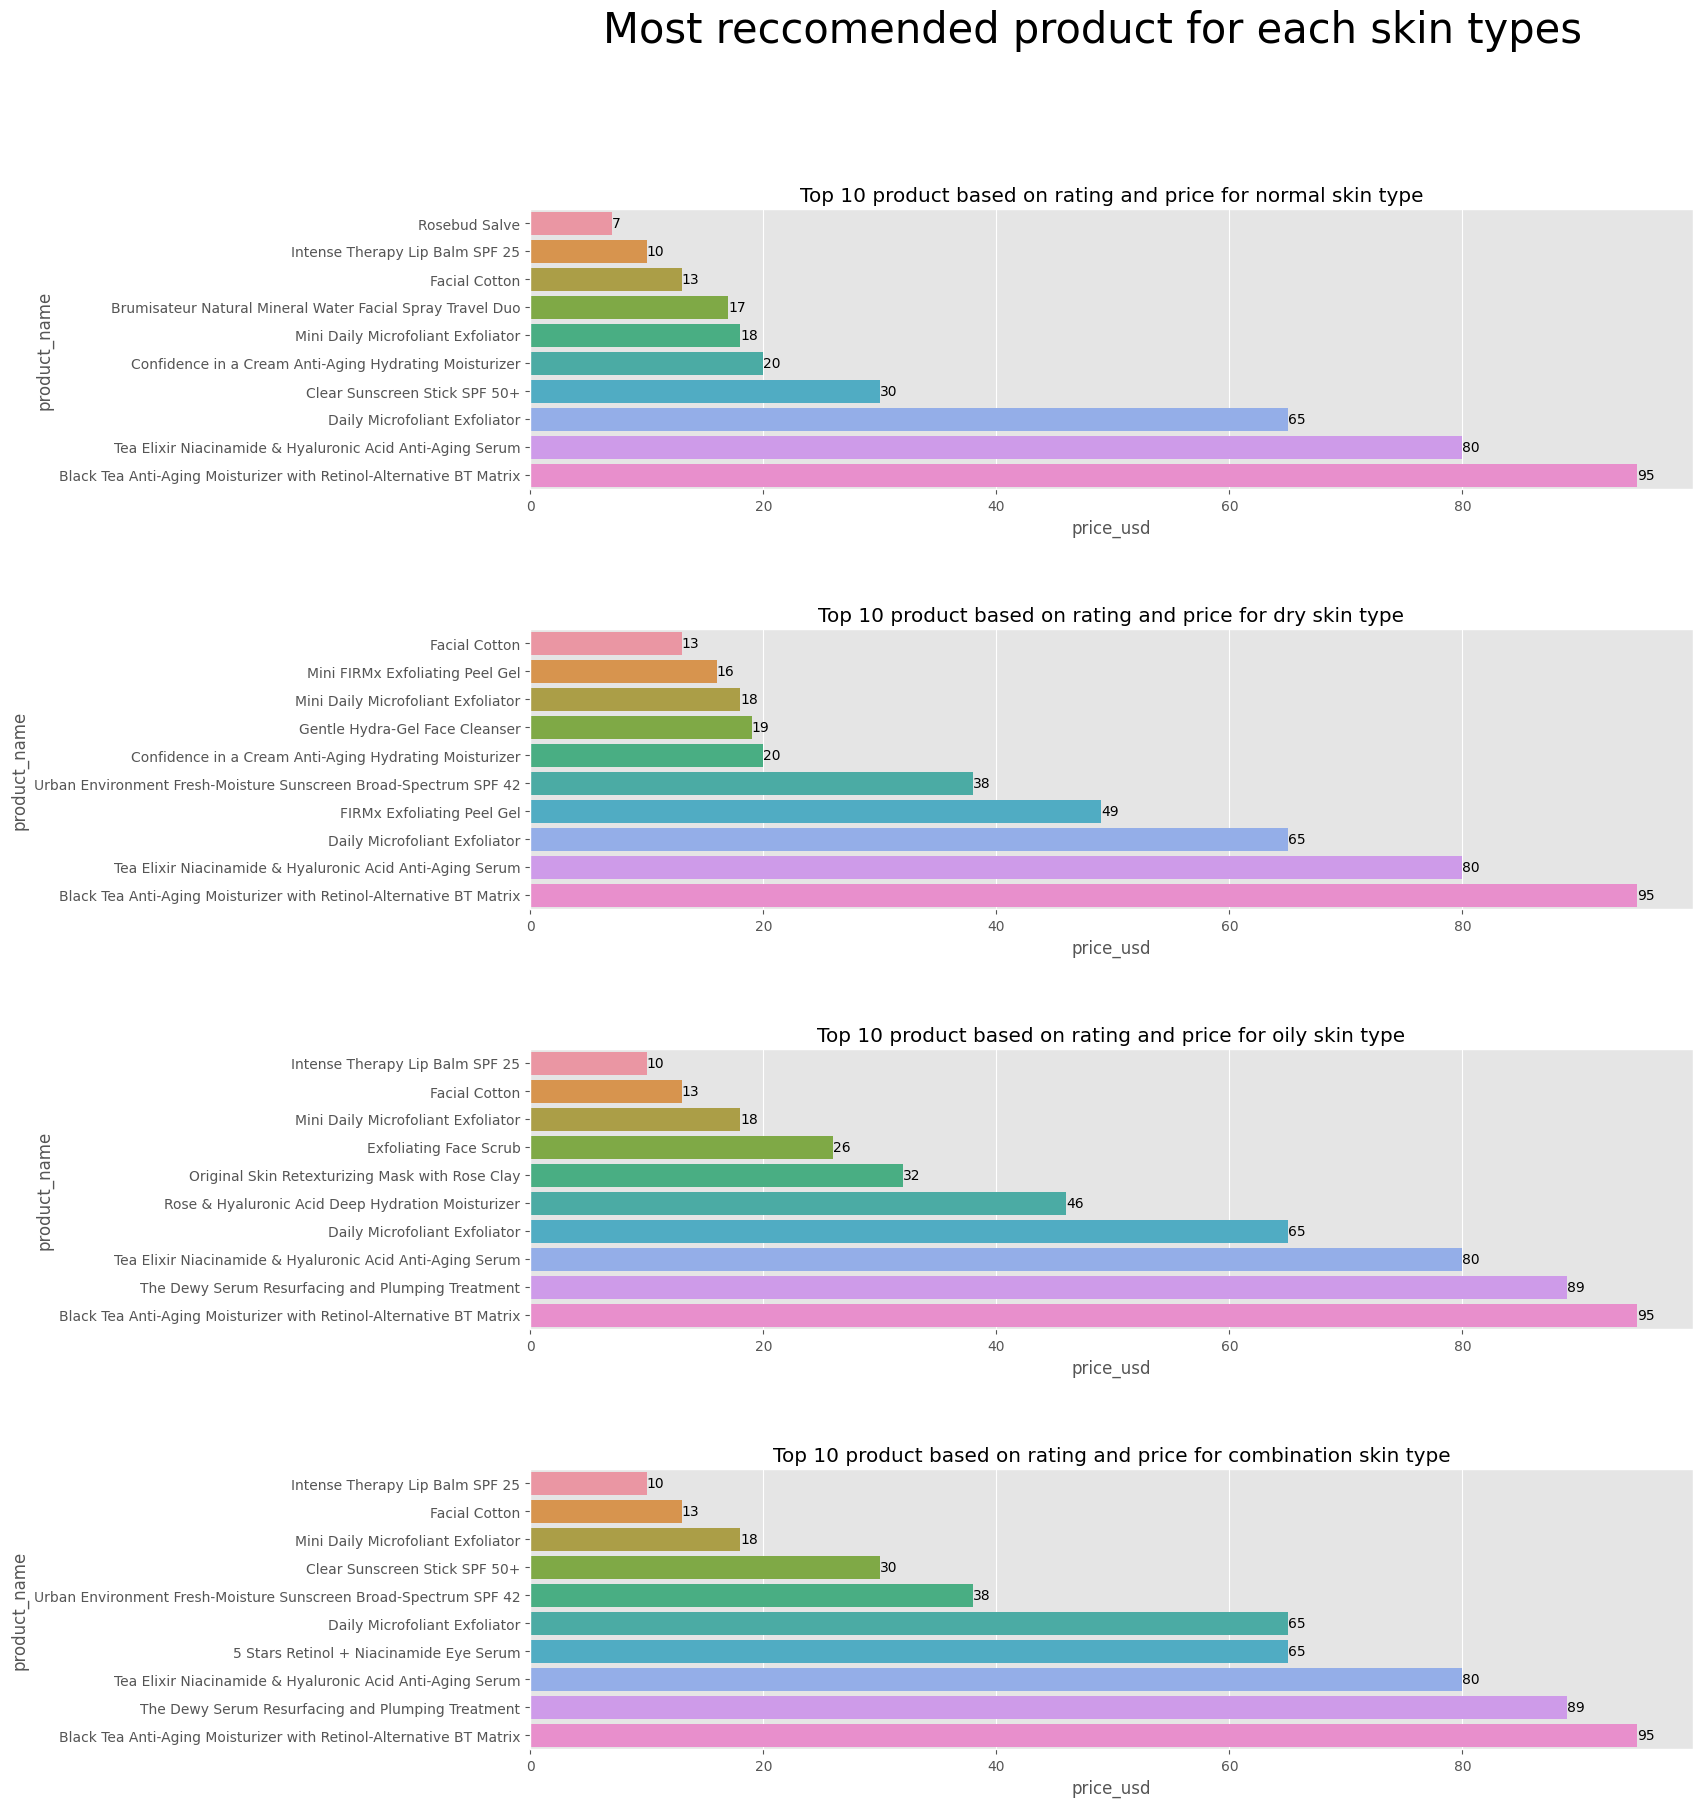

In [ ]:
# Most reccomended product for each skin_type
fig, (ax1,ax2,ax3,ax4) = plt.subplots(nrows=4,ncols=1,figsize= (15,20))
fig.subplots_adjust(hspace=0.5)

product_skin = df.groupby(['skin_type','product_id','product_name','price_usd']).mean(numeric_only=True)['rating'].reset_index()\
.sort_values('rating',ascending=False)

normal_skin = product_skin[product_skin['skin_type'] == 'normal'].sort_values('price_usd',ascending=True)\
.sort_values(['rating'],ascending=False).head(10)\
.sort_values('price_usd',ascending=True)
ax1 = sns.barplot(normal_skin,x='price_usd',y='product_name',ax=ax1)
ax1.set_title("Top 10 product based on rating and price for normal skin type")
for i in ax1.containers:
    ax1.bar_label(i)

dry_skin = product_skin[product_skin['skin_type'] == 'dry'].sort_values('price_usd',ascending=True)\
.sort_values(['rating'],ascending=False).head(10)\
.sort_values('price_usd',ascending=True)
ax2 = sns.barplot(dry_skin,x='price_usd',y='product_name',ax=ax2)
ax2.set_title("Top 10 product based on rating and price for dry skin type")
for i in ax2.containers:
    ax2.bar_label(i)

oily_skin = product_skin[product_skin['skin_type'] == 'oily'].sort_values('price_usd',ascending=True)\
.sort_values(['rating'],ascending=False).head(10)\
.sort_values('price_usd',ascending=True)
ax3 = sns.barplot(oily_skin,x='price_usd',y='product_name',ax=ax3)
ax3.set_title("Top 10 product based on rating and price for oily skin type")
for i in ax3.containers:
    ax3.bar_label(i)
combination_skin = product_skin[product_skin['skin_type'] == 'combination'].sort_values('price_usd',ascending=True)\
.sort_values(['rating'],ascending=False).head(10)\
.sort_values('price_usd',ascending=True)
ax4 = sns.barplot(combination_skin,x='price_usd',y='product_name',ax=ax4)
ax4.set_title("Top 10 product based on rating and price for combination skin type")
for i in ax4.containers:
    ax4.bar_label(i)


fig.suptitle("Most reccomended product for each skin types",fontsize=30)

## Apriori Algorithm

In [ ]:
from mlxtend.frequent_patterns import association_rules, apriori

In [ ]:
transactions_str = df.groupby(['rating', 'product_name'])['product_name'].count().reset_index(name ='Count')
transactions_str

,rating,product_name,Count
0,1,100 percent Pure Argan Oil,266
1,1,100% Organic Cold-Pressed Rose Hip Seed Oil,97
2,1,5 Stars Retinol + Niacinamide Eye Serum,66
3,1,A-Passioni Retinol Cream,137
4,1,AHA 30% + BHA 2% Exfoliating Peeling Solution,117
...,...,...,...
1235,5,Watermelon Glow PHA + BHA Pore-Tight Toner,2201
1236,5,Watermelon Pink Juice Oil-Free Moisturizer,1072
1237,5,Whipped Argan Oil Face Butter,818
1238,5,Wild Rose Night-Brightening Sleeping Facial,954


In [ ]:
# making a mxn matrice where m=transaction and n=items and each row represents whether the item was in the transaction or not
my_basket = transactions_str.pivot_table(index='rating', columns='product_name', values='Count', aggfunc='sum').fillna(0)


my_basket.head()

product_name,100 percent Pure Argan Oil,100% Organic Cold-Pressed Rose Hip Seed Oil,5 Stars Retinol + Niacinamide Eye Serum,A-Passioni Retinol Cream,AHA 30% + BHA 2% Exfoliating Peeling Solution,Abeille Royale Advanced Youth Watery Oil,Acne Control Clarifying Cleanser,Adaptogen Deep Moisturizing Cream with Ashwagandha + Reishi,Advanced Génifique Radiance Boosting Face Serum,Advanced Night Repair Eye Gel-Cream,...,Vitamin Enriched Face Base Priming Moisturizer,Volcanic AHA Pore Clearing Clay Mask,Water Drench Hyaluronic Acid Moisturizer,Watermelon Glow Niacinamide Dew Drops,Watermelon Glow Niacinamide Sunscreen SPF 50,Watermelon Glow PHA + BHA Pore-Tight Toner,Watermelon Pink Juice Oil-Free Moisturizer,Whipped Argan Oil Face Butter,Wild Rose Night-Brightening Sleeping Facial,Yo Glow AHA & BHA Facial Enzyme Scrub
rating,,,,,,,,,,,,,,,,,,,,,
1,266.0,97.0,66.0,137.0,117.0,22.0,229.0,102.0,77.0,21.0,...,65.0,32.0,111.0,110.0,173.0,146.0,171.0,105.0,71.0,166.0
2,271.0,70.0,15.0,72.0,76.0,33.0,101.0,122.0,50.0,40.0,...,78.0,23.0,138.0,98.0,156.0,147.0,178.0,84.0,69.0,117.0
3,375.0,87.0,28.0,54.0,148.0,105.0,154.0,157.0,101.0,190.0,...,143.0,43.0,128.0,128.0,140.0,243.0,209.0,136.0,91.0,147.0
4,1256.0,204.0,263.0,139.0,397.0,414.0,441.0,230.0,297.0,584.0,...,576.0,179.0,239.0,316.0,168.0,584.0,300.0,251.0,239.0,363.0
5,5595.0,1165.0,1349.0,864.0,2508.0,661.0,1647.0,1462.0,1078.0,960.0,...,2579.0,923.0,1217.0,1548.0,658.0,2201.0,1072.0,818.0,954.0,1419.0


In [ ]:
# making a function which returns 0 or 1
# 0 means item was not in that transaction, 1 means item present in that transaction

def encode(x):
    if x<=0:
        return 0
    if x>=1:
        return 1

# applying the function to the dataset

my_basket_sets = my_basket.applymap(encode)
my_basket_sets.head()

product_name,100 percent Pure Argan Oil,100% Organic Cold-Pressed Rose Hip Seed Oil,5 Stars Retinol + Niacinamide Eye Serum,A-Passioni Retinol Cream,AHA 30% + BHA 2% Exfoliating Peeling Solution,Abeille Royale Advanced Youth Watery Oil,Acne Control Clarifying Cleanser,Adaptogen Deep Moisturizing Cream with Ashwagandha + Reishi,Advanced Génifique Radiance Boosting Face Serum,Advanced Night Repair Eye Gel-Cream,...,Vitamin Enriched Face Base Priming Moisturizer,Volcanic AHA Pore Clearing Clay Mask,Water Drench Hyaluronic Acid Moisturizer,Watermelon Glow Niacinamide Dew Drops,Watermelon Glow Niacinamide Sunscreen SPF 50,Watermelon Glow PHA + BHA Pore-Tight Toner,Watermelon Pink Juice Oil-Free Moisturizer,Whipped Argan Oil Face Butter,Wild Rose Night-Brightening Sleeping Facial,Yo Glow AHA & BHA Facial Enzyme Scrub
rating,,,,,,,,,,,,,,,,,,,,,
1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
5,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [ ]:
# Menghapus kolom tertentu dari dataset
kolom_hapus = ['Unnamed: 0','author_id','is_recommended','helpfulness','submission_time','skin_tone','eye_color','skin_type','hair_color','dayofweek','price_usd','product_id']  # Ganti dengan nama kolom yang ingin dihapus
df.drop(kolom_hapus, axis=1)


,rating,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,review_text,review_title,product_name,brand_name,year,month,day,weekday
0,5,2,0,2,I use this with the Nudestix “Citrus Clean Bal...,Taught me how to double cleanse!,Gentle Hydra-Gel Face Cleanser,NUDESTIX,2023,2,1,2
1,1,0,0,0,I bought this lip mask after reading the revie...,Disappointed,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,2023,3,21,1
2,5,0,0,0,My review title says it all! I get so excited ...,New Favorite Routine,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,2023,3,21,1
3,5,0,0,0,I’ve always loved this formula for a long time...,Can't go wrong with any of them,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,2023,3,20,0
4,5,0,0,0,"If you have dry cracked lips, this is a must h...",A must have !!!,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,2023,3,20,0
...,...,...,...,...,...,...,...,...,...,...,...,...
602125,5,12,0,12,I can’t say enough great things about this pro...,HOLY GRAIL- lash extension safe!!,Triple Algae Eye Renewal Balm Eye Cream,Algenist,2020,12,17,3
602126,5,4,0,4,I have been using this product for over 6 week...,Game changer!,Triple Algae Eye Renewal Balm Eye Cream,Algenist,2020,12,17,3
602127,5,10,0,10,I love the Triple Algae Eye Renewal Balm! Once...,Triple Algae Eye Renewal Balm is a MUST HAVE,Triple Algae Eye Renewal Balm Eye Cream,Algenist,2020,12,17,3
602128,5,5,0,5,This made the lines around my eyes so much bet...,NaN,Triple Algae Eye Renewal Balm Eye Cream,Algenist,2020,12,17,3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602130 entries, 0 to 602129
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   Unnamed: 0                602130 non-null  int64         
 1   author_id                 602130 non-null  object        
 2   rating                    602130 non-null  int64         
 3   is_recommended            484644 non-null  float64       
 4   helpfulness               270298 non-null  float64       
 5   total_feedback_count      602130 non-null  int64         
 6   total_neg_feedback_count  602130 non-null  int64         
 7   total_pos_feedback_count  602130 non-null  int64         
 8   submission_time           602130 non-null  datetime64[ns]
 9   review_text               601131 non-null  object        
 10  review_title              435119 non-null  object        
 11  skin_tone                 496074 non-null  object        
 12  ey

In [ ]:
#Label Encoding mengubah atribut bertipe data categorical menjadi numerical
print(df['is_recommended'].unique(), '\n')
print(df['helpfulness'].unique(), '\n')
print(df['submission_time'].unique(), '\n')
print(df['review_text'].unique(), '\n')
print(df['review_title'].unique(), '\n')
print(df['skin_tone'].unique(), '\n')
print(df['eye_color'].unique(), '\n')
print(df['skin_type'].unique(), '\n')
print(df['hair_color'].unique(), '\n')
print(df['product_id'].unique(), '\n')
print(df['product_name'].unique(), '\n')
print(df['price_usd'].unique(), '\n')
print(df['dayofweek'].unique(), '\n')
print(df['brand_name'].unique(), '\n')

labelencoder = LabelEncoder()
df['is_recommended'] = labelencoder.fit_transform(df['is_recommended'])
print(df['is_recommended'].unique(), '\n')
df['helpfulness'] = labelencoder.fit_transform(df['helpfulness'])
print(df['helpfulness'].unique(), '\n')
df['submission_time'] = labelencoder.fit_transform(df['submission_time'])
print(df['submission_time'].unique(), '\n')
df['review_text'] = labelencoder.fit_transform(df['review_text'])
print(df['review_text'].unique(), '\n')
df['review_title'] = labelencoder.fit_transform(df['review_title'])
print(df['review_title'].unique(), '\n')
df['skin_tone'] = labelencoder.fit_transform(df['skin_tone'])
print(df['skin_tone'].unique(), '\n')
df['eye_color'] = labelencoder.fit_transform(df['eye_color'])
print(df['eye_color'].unique(), '\n')
df['skin_type'] = labelencoder.fit_transform(df['skin_type'])
print(df['skin_type'].unique(), '\n')
df['hair_color'] = labelencoder.fit_transform(df['hair_color'])
print(df['hair_color'].unique(), '\n')
df['product_id'] = labelencoder.fit_transform(df['product_id'])
print(df['product_id'].unique(), '\n')
df['product_name'] = labelencoder.fit_transform(df['product_name'])
print(df['product_name'].unique(), '\n')
df['price_usd'] = labelencoder.fit_transform(df['price_usd'])
print(df['price_usd'].unique(), '\n')
df['dayofweek'] = labelencoder.fit_transform(df['dayofweek'])
print(df['dayofweek'].unique(), '\n')
df['brand_name'] = labelencoder.fit_transform(df['brand_name'])
print(df['brand_name'].unique(), '\n')


[1 0 2] 

[2313 2314  301 ... 2278  831 2098] 

[5268 5316 5315 ...  150   45   13] 

[236506  84044 334192 ... 155844 429659 369061] 

[145035  34696 106580 ...  67059 153092 138354] 

[14  5  6  4  3  7  9  8 13 12 10  1 11  0  2] 

[2 6 5 1 4 3 0] 

[1 4 0 2 3] 

[1 7 2 3 4 5 0 6] 

[244  81 248  14  19  21  46  76 164 111  61 140 108  29  65  89 215  18
 147  96  84  27  45 118 231   8 168 182  78 172   5  59 109 191 148   7
  22  42 125 233 186 207  25 171 211 141 230  16 139  36 176  17 173 225
  94 119  28 133  31  98 181 249 103 120  11 228 232 101  82  51  23  58
  71  86  92  63  70 217 144 194 229 137 245  44  90  32   6 192 193 196
  20 112 246 135 195  93  60 174 185   9  83 202 178 187  38 107 126 123
 200 105 179  48 122  24 227 156  10 151 222 216 130  49 115 198  53 241
 159 239 155  40 189  68  66 213 240  79 161  47  57 208  99 223  26 136
   1  34 165  97  75 167  62 218  88  41 138   3  39 106  12 132 110  43
 163  50  37 150 247 114 158  15 149 116   0 142 121 169

In [ ]:
df.head(5)

,Unnamed: 0,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,...,hair_color,product_id,product_name,brand_name,price_usd,year,month,day,weekday,dayofweek
0,0,1741593524,5,1,2313,2,0,2,5268,236506,...,1,244,80,33,21,2023,2,1,2,6
1,1,31423088263,1,0,2314,0,0,0,5316,84044,...,7,81,112,28,26,2023,3,21,1,5
2,2,5061282401,5,1,2314,0,0,0,5316,334192,...,2,81,112,28,26,2023,3,21,1,5
3,3,6083038851,5,1,2314,0,0,0,5315,283352,...,1,81,112,28,26,2023,3,20,0,1
4,4,47056667835,5,1,2314,0,0,0,5315,258839,...,7,81,112,28,26,2023,3,20,0,1


In [ ]:
#Membagi variabel bebas dan terikat
#X merupakan variabel bebas dan y merupakan variabel terikat
X = df[['helpfulness','total_feedback_count',	'total_neg_feedback_count', 'total_pos_feedback_count','review_text','product_name']]
y = df['rating']

In [ ]:
#Membagi proporsi jumlah data training dan testing
#Rasio data training sebesar 80% dari jumlah dataset keseleuruhan
#Rasio data testing sebesar 20% dari jumlah dataset keseleuruhan
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [ ]:
#MinMaxScaler
#Normalisasi data, mengubah data pada rentang 0 sampai 1
sc = MinMaxScaler(feature_range=(0, 1))

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

print(X_train, "\n")
print(X_test, "\n")

[[1.         0.         0.         0.         0.62402673 0.05645161]
 [1.         0.         0.         0.         0.16406964 0.43548387]
 [1.         0.         0.         0.         0.89695496 0.60483871]
 ...
 [1.         0.         0.         0.         0.96384819 0.51612903]
 [1.         0.         0.         0.         0.13723014 0.7016129 ]
 [1.         0.         0.         0.         0.40911996 0.91129032]] 

[[1.         0.         0.         0.         0.00700144 0.36290323]
 [1.         0.         0.         0.         0.36173046 0.93951613]
 [1.         0.         0.         0.         0.89965327 0.09274194]
 ...
 [1.         0.         0.         0.         0.21194689 0.19354839]
 [1.         0.         0.         0.         0.22918301 0.27419355]
 [1.         0.         0.         0.         0.46828801 0.43548387]] 



In [ ]:
# Membuat model Naive Bayes
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [ ]:
#Evaluasi model Naive Bayes
print("Classification Report : \n", classification_report(y_test, y_pred, zero_division=1))
print("F1 Score:\n", f1_score(y_test, y_pred, average='weighted', zero_division=1))
print("Precision Score : \n", precision_score(y_test, y_pred,average='weighted', zero_division=1))
print("Recall Score : \n", recall_score(y_test, y_pred, average='weighted',zero_division=1))
print("Accuracy Score : \n", accuracy_score(y_test, y_pred))

Classification Report : 
               precision    recall  f1-score   support

           1       0.37      0.07      0.12      6553
           2       0.11      0.14      0.13      5808
           3       1.00      0.00      0.00      8631
           4       0.15      0.06      0.08     21567
           5       0.68      0.90      0.77     77867

    accuracy                           0.60    120426
   macro avg       0.46      0.23      0.22    120426
weighted avg       0.56      0.60      0.53    120426

F1 Score:
 0.5276655767158508
Precision Score : 
 0.5621545625735597
Recall Score : 
 0.6024280470994636
Accuracy Score : 
 0.6024280470994636


In [ ]:
#Membuat model Decision Tree
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [ ]:
#Evaluasi model Decision Tree
print("Classification Report : \n", classification_report(y_test, y_pred, zero_division=1))
print("F1 Score:\n", f1_score(y_test, y_pred, average='weighted', zero_division=1))
print("Precision Score : \n", precision_score(y_test, y_pred,average='weighted', zero_division=1))
print("Recall Score : \n", recall_score(y_test, y_pred, average='weighted',zero_division=1))
print("Accuracy Score : \n", accuracy_score(y_test, y_pred))

Classification Report : 
               precision    recall  f1-score   support

           1       0.41      0.25      0.31      6553
           2       1.00      0.00      0.00      5808
           3       1.00      0.00      0.00      8631
           4       1.00      0.00      0.00     21567
           5       0.66      0.99      0.79     77867

    accuracy                           0.65    120426
   macro avg       0.81      0.25      0.22    120426
weighted avg       0.75      0.65      0.53    120426

F1 Score:
 0.529736493024808
Precision Score : 
 0.7491178363189303
Recall Score : 
 0.6533057645358976
Accuracy Score : 
 0.6533057645358976


In [ ]:
#Membuat model Logistic Regression
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#Evaluasi model Logistic Regression
print("Classification Report : \n", classification_report(y_test, y_pred, zero_division=1))
print("F1 Score:\n", f1_score(y_test, y_pred, average='weighted', zero_division=1))
print("Precision Score : \n", precision_score(y_test, y_pred,average='weighted', zero_division=1))
print("Recall Score : \n", recall_score(y_test, y_pred, average='weighted',zero_division=1))
print("Accuracy Score : \n", accuracy_score(y_test, y_pred))

Classification Report : 
               precision    recall  f1-score   support

           1       0.49      0.05      0.09      6553
           2       1.00      0.00      0.00      5808
           3       1.00      0.00      0.00      8631
           4       1.00      0.00      0.00     21567
           5       0.65      1.00      0.79     77867

    accuracy                           0.65    120426
   macro avg       0.83      0.21      0.17    120426
weighted avg       0.75      0.65      0.51    120426

F1 Score:
 0.5134174674281986
Precision Score : 
 0.7452501043233686
Recall Score : 
 0.6482321093451581
Accuracy Score : 
 0.6482321093451581


In [ ]:
#Membuat model Random Forest
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [ ]:
#Evaluasi model Random Forest
print("Classification Report : \n", classification_report(y_test, y_pred, zero_division=1))
print("F1 Score:\n", f1_score(y_test, y_pred, average='weighted', zero_division=1))
print("Precision Score : \n", precision_score(y_test, y_pred,average='weighted', zero_division=1))
print("Recall Score : \n", recall_score(y_test, y_pred, average='weighted',zero_division=1))
print("Accuracy Score : \n", accuracy_score(y_test, y_pred))

Classification Report : 
               precision    recall  f1-score   support

           1       0.34      0.31      0.32      6553
           2       0.18      0.12      0.15      5808
           3       0.18      0.13      0.15      8631
           4       0.28      0.22      0.25     21567
           5       0.72      0.81      0.76     77867

    accuracy                           0.59    120426
   macro avg       0.34      0.32      0.33    120426
weighted avg       0.55      0.59      0.57    120426

F1 Score:
 0.5703066879874825
Precision Score : 
 0.554226059073499
Recall Score : 
 0.5922724328633352
Accuracy Score : 
 0.5922724328633352
